In [1]:
import pandas as pd
import re
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [2]:
real = pd.read_csv('/Users/kshitijaupasham/Desktop/Fake_And_Real_News/True.csv')
real.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [3]:
fake = pd.read_csv('/Users/kshitijaupasham/Desktop/Fake_And_Real_News/Fake.csv')
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
real['target'] = 1
fake['target'] = 0
df = pd.concat([real,fake])
df.drop(['text','subject','date'],axis=1,inplace=True)
df.head()

,title,target
0,"As U.S. budget fight looms, Republicans flip t...",1
1,U.S. military to accept transgender recruits o...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,1
3,FBI Russia probe helped by Australian diplomat...,1
4,Trump wants Postal Service to charge 'much mor...,1


In [5]:
df['target'].value_counts()

0    23481
1    21417
Name: target, dtype: int64

In [6]:
text=[]
for i in range(len(df)):
    sample=re.sub('[^a-zA-Z]',' ',df['title'].iloc[i])
    sample=sample.lower()
    sample=sample.split()
    sample=' '.join(sample)
    text.append(sample)
text[:20]

['as u s budget fight looms republicans flip their fiscal script',
 'u s military to accept transgender recruits on monday pentagon',
 'senior u s republican senator let mr mueller do his job',
 'fbi russia probe helped by australian diplomat tip off nyt',
 'trump wants postal service to charge much more for amazon shipments',
 'white house congress prepare for talks on spending immigration',
 'trump says russia probe will be fair but timeline unclear nyt',
 'factbox trump on twitter dec approval rating amazon',
 'trump on twitter dec global warming',
 'alabama official to certify senator elect jones today despite challenge cnn',
 'jones certified u s senate winner despite moore challenge',
 'new york governor questions the constitutionality of federal tax overhaul',
 'factbox trump on twitter dec vanity fair hillary clinton',
 'trump on twitter dec trump iraq syria',
 'man says he delivered manure to mnuchin to protest new u s tax law',
 'virginia officials postpone lottery drawing to

In [7]:
cv = CountVectorizer(max_features=80000,ngram_range=(1,2))
X = cv.fit_transform(text).toarray()
y=df['target']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
clf = MultinomialNB(alpha=0.2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy=metrics.accuracy_score(y_test,y_pred)
f_score=metrics.f1_score(y_test, y_pred)
print('accuracy: ',accuracy)
print('f1 score: ',f_score)

accuracy:  0.956792873051225
f1 score:  0.9549779531213738


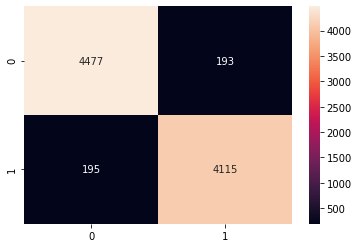

In [10]:
sns.heatmap(metrics.confusion_matrix(y_test,y_pred),annot=True,fmt='d');